In [2]:
import pandas as pd
from carga_datos import  columnas_ndvi
import matplotlib.pyplot as plt
import numpy as np
import ftfy
import geopandas as gpd
import json

green_spaces_data cargada


Cargar BDD

In [19]:
df_summer = pd.read_csv("green_spaces_data/summerNDVI_corregido.csv",  encoding='utf-8')
df_winter = pd.read_csv("green_spaces_data/winterNDVI_corregido.csv",  encoding='utf-8')

Seleccionar Region de Vaplaraíso

In [22]:
df_summer_valparaiso = df_summer.loc[df_summer["NOM_REG"] == "Valparaíso"]
df_winter_valparaiso = df_winter.loc[df_winter["NOM_REG"] == "Valparaíso"]

# Imprimir DataFrame de verano
#print("Summer DataFrame Región de Valparaíso:")
print(df_summer_valparaiso)
# Imprimir DataFrame de invierno
#print("\nWinter DataFrame Región de Valparaíso:")
#print(df_winter_valparaiso)

      0_NDVI   10_NDVI   11_NDVI   12_NDVI   13_NDVI   14_NDVI   15_NDVI  \
0   0.310635  0.256847  0.238066  0.239924  0.287034  0.275731  0.281610   
1   0.427025  0.384727  0.381350  0.370397  0.414595  0.394137  0.441975   
2   0.447167  0.454900  0.401575  0.415328  0.462160  0.424138  0.470730   
3   0.468601  0.519406  0.450752  0.465870  0.505518  0.480983  0.496506   
4   0.501512  0.589136  0.498711  0.522528  0.559669  0.531453  0.547964   
5   0.425358  0.462299  0.381040  0.409650  0.461096  0.431245  0.457694   
6   0.487655  0.539550  0.442884  0.470177  0.515996  0.476860  0.501253   
7   0.453131  0.504768  0.429951  0.437647  0.484684  0.461070  0.469620   
8   0.425312  0.422269  0.390010  0.437115  0.461785  0.429495  0.477582   
9   0.389686  0.349141  0.362494  0.378919  0.405092  0.382068  0.425432   
10  0.424410  0.396989  0.348638  0.352377  0.416030  0.388516  0.418929   
11  0.265416  0.204271  0.187383  0.193901  0.240806  0.232165  0.244214   
12  0.409637

# Tablas con los valores de NDVI por año

Creamos copias

In [47]:
df_summer_valparaiso_copy = df_summer_valparaiso.copy()
df_winter_valparaiso_copy =df_winter_valparaiso.copy()

Ordenamos columnas de NDVI por orden cronológico

In [48]:
def extraer_numero(columna):
    return int(columna.split('_')[0])

# Ordenamos las columnas
ordered_ndvi_columns = sorted(columnas_ndvi, key=extraer_numero)

# Summer
# Reorganizamos las columnas, primero las ordenadas NDVI y luego el resto de las columnas
df_summer_valparaiso_copy = df_summer_valparaiso_copy[ordered_ndvi_columns + [col for col in df_summer_valparaiso_copy.columns if '_NDVI' not in col]]

# Winter
df_winter_valparaiso_copy = df_winter_valparaiso_copy[ordered_ndvi_columns + [col for col in df_winter_valparaiso_copy.columns if '_NDVI' not in col]]

Primero cambiamos las etiquetas (0_NDVI por 2002_NDVI)

In [49]:
# Crea diccionario con etiquetas nuevas. Reempolaza 0_NDVI con 2002_NDVI
nueva_etiqueta_ndvi = {
    f"{i}_NDVI": f"{2002 + i}_NDVI" for i in range(21)  # De 0_NDVI (2002) a 20_NDVI (2022)
}

# Cambiamos etiqueta
df_summer_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)
df_winter_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)

## Tablas de la Región de Valparaíso

In [ ]:
print("Tabla VERANO con los valores de NDVI para todas las comunas de la Región de Valparaíso en el tiempo ")
df_summer_valparaiso_copy


In [ ]:
print("Tabla INVIERNO con los valores de NDVI para todas las comunas de la Región de Valparaíso en el tiempo ")
df_winter_valparaiso_copy

## Tablas de las Provincias de Valparaíso

### Tablas de la Provincia de Valparaíso

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Valparaíso ")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Valparaíso']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Valparaíso ")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Valparaíso']

### Tablas de la Provincia de Petorca

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Petorca")
df_summer_provincia_petorca = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Petorca']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Petorca")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Petorca']

### Tablas de la Provincia de Quillota

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Quillota")
df_quillota = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Quillota']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Quillota")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Quillota']

### Tablas de la Provincia de San Felipe

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de San Felipe")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'San Felipe']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de San Felipe")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'San Felipe']

### Tablas de la Provincia de Los Andes

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Los Andes")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Los Andes']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Los Andes")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Los Andes']

### Tablas de la Provincia de San Antonio

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de San Antonio")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'San Antonio']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de San Antonio")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'San Antonio']

### Tablas de la Provincia de Marga Marga
(no hay datos)

### Tablas de la Provincia de Isla de Pascua
(no hay datos)

## Mapa coroplético Región de Valparaíso

fuente: https://github.com/Carlos-Olivares/Mapa-Coropletico/blob/main/Mapa_Coropletico.ipynb

### Verano

Cargar imagen polígono

In [42]:
#Importar poligonos de comunas
shapefile = 'Poligonos//Comunas//comunas.shp'

#Leer shapefile con geopandas
gdf = gpd.read_file(shapefile, encoding='utf-8')[['codregion', 'Region', 'cod_comuna', 'Comuna', 'Provincia', 'geometry']]

#Filtramos solo RM
gdf = gdf[gdf['codregion'] == 5]

In [43]:
#Columnas de interés
gdf = gdf[['cod_comuna', 'Comuna', 'geometry']]

In [55]:
# Unir los dos dataframes por el código de la comuna
# Asegúrate de que los nombres de las columnas coincidan en ambos dataframes
df_merged = gdf.merge(df_summer_valparaiso_copy, how='left', left_on='cod_comuna', right_on='COD_COMUNA')

In [64]:
df_merged['2002_NDVI'] = df_merged['2002_NDVI'].fillna(0)  

#### 2002

In [60]:
df_merged = df_merged.dropna(subset=['2002_NDVI'])

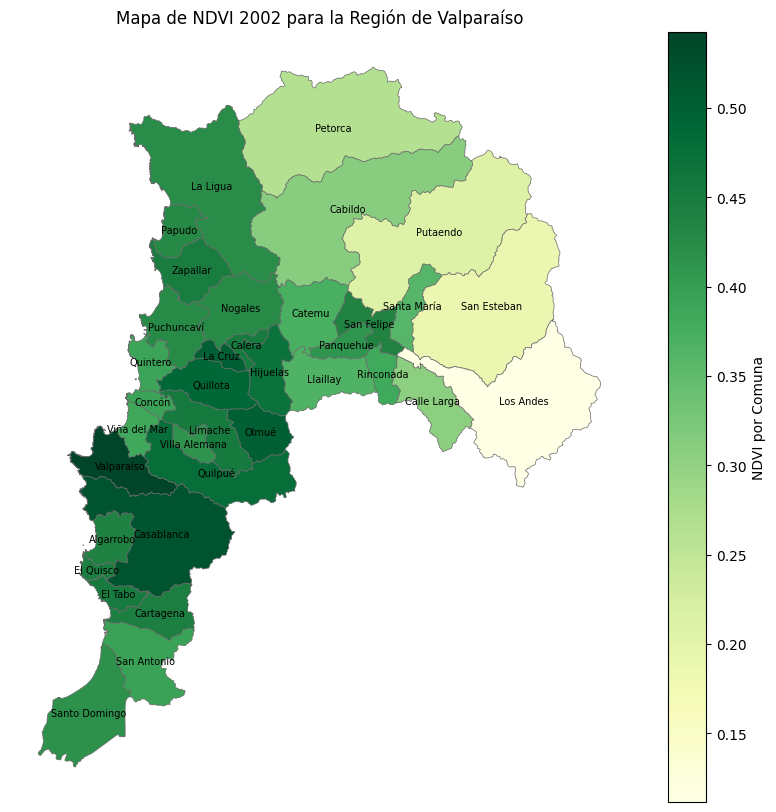

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # Aumentar más el tamaño de la figura

df_merged.plot(column='2002_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores: 'YlGn' de amarillo a verde
              missing_kwds={'color': 'lightgray'},  # Comunas sin datos tendrán color gris
              edgecolor='dimgray', linewidth=0.5)  # Agregar bordes negros a las comunas

for i, row in df_merged.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar el nombre y el valor de NDVI
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

#for i, row in df_merged.iterrows():
#    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
#    label = f"{row['NOM_COM']}: {row['2002_NDVI']:.2f}"  # Mostrar el nombre y el valor de NDVI
#    ax.text(x, y, label, fontsize=5.5, ha='center', va='center', color='black', fontweight=570) 

ax.set_axis_off()
plt.title('Mapa de NDVI 2002 para la Región de Valparaíso')
plt.show()

#### 2003

#### 2004

#### 2005

#### 2006

#### 2007

#### 2008

#### 2009

#### 2010

#### 2011

#### 2012

#### 2013

#### 2014

#### 2015

#### 2016

#### 2017

#### 2018

#### 2019

#### 2020

#### 2021

#### 2022

### Invierno

## Promedio de NDVI entre 2002-2022 por cada comuna de Valparaíso 

In [ ]:
# Calcular el promedio entre todas las columnas NDVI para cada fila
# Usamos columnas_ndvi = [col for col in df_summer.columns if '_NDVI' in col] que importamos más arriba
df_summer_valparaiso = df_summer.loc[df_summer["NOM_REG"] == "Valparaíso"].copy()  # Usar .copy() para asegurar que estás trabajando con una copia independiente
df_winter_valparaiso = df_winter.loc[df_winter["NOM_REG"] == "Valparaíso"].copy()  # Lo mismo para el df_winter
# Mostrar los resultados
print("Promedio NDVI por comuna Summer (2002-2022):")
print(df_summer_valparaiso[['NOM_COM', 'Mean_NDVI']])
print("\nPromedio NDVI por comuna Winter (2002-2022):")
print(df_winter_valparaiso[['NOM_COM', 'Mean_NDVI']])